In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Split Barcode
### 20201203 by RAR035 

Idea:
Want to quantify the memory of expanding colonies. Transduce cells with DNA barcodes and passage them 1-2 times at clonal densities. The read out will be the unique barcodes per colony in each plate and compare to see if the same barcodes grew out in each plate. 

Question:
Is the proliferative capacity of these cells maintained through re-plating?
How much memory does the expanding colonies (high proliferative state) have?


https://docs.google.com/document/d/1L_QCdWbsC_e7zZk72T4BySfJWG2C61YySyi4-3z8EPs/edit

### Procedure

Thaw fresh vial of STR cells and passage at least once.

Transduce cells with unique barcodes (at 12% +GFP to reduce double tags).

Three days later, sort cells with barcodes (+GFP). 
Split 5ways
Each split gets 900*4
Minimum cell sorted = 5*1000*4 = 20k (going to sort at least 100k) 

Allow cells to grow.
4 doublings (1.5 doublings per day)

Passage cells at clonal density
3 wells/plates
Grow for 7.5 days

Pellet one plate and passage the other two wells/plates
4 wells/plates (two per well/plate)
Grow for 7.5 days

Lyse cells and extract barcodes
Spike in Dylan’s/Arias WM989 with known barcodes
Column purify (might lose barcodes)

PCR and clean up. 


### Output:
Each plate will have its separate barcode reads. We then compare the reads (that thanks to the spike-ins can be interpreted as cells) between the different plates that have been passaged. If a barcode is highly expressed in all plates then we can say that it has high memory. 


# Load in Data

In [3]:
def rpm_norm(sample):
    scaling_factor = sum(sample['reads'])/1000000
    sample['RPM'] = sample['reads']/scaling_factor
    sample['RPM_log'] = np.log10(sample['reads']/scaling_factor)
    return sample

In [4]:
output_path = "/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/density_barcode/plots"

In [5]:
def rpm_norm(sample):
    scaling_factor = sum(sample['reads'])/1000000
    sample['RPM'] = sample['reads']/scaling_factor
    sample['RPM_log'] = np.log10(sample['reads']/scaling_factor)
    return sample

output_path = "/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/density_barcode/plots"
path_to_data = "/Volumes/GoogleDrive/My Drive/Hueros_Shared/Paper/Data/density_barcode/Data/RAR021_STR_gDNA_density/repo/analyzed/*/*/*.txt"
paths_to_data = glob.glob(path_to_data)

ID_l = [100,100,10000,10000,1000,1000,500,500,5000,5000]

data_o = pd.read_csv(paths_to_data[0], sep= "\t", header=None)
data_o.columns = ["seq", "reads"]
data_o = rpm_norm(data_o)

file_name = [paths_to_data[0].split('/')[-1].split('_cluster')[0] for i in range(len(data_o))]
data_o['file_d'] = file_name 

barcode = [j for j in range(len(data_o))]
data_o['barcode'] = barcode

ID = [str(ID_l[0]) for _ in range(len(data_o))]#[paths_to_data[0].split('/')[-1].split('_')[1] for i in range(len(data_o))]
data_o['ID'] = ID

ID_num = [ID_l[0] for _ in range(len(data_o))]#[paths_to_data[0].split('/')[-1].split('_')[1] for i in range(len(data_o))]
data_o['ID_num'] = ID_num


for i,path in enumerate(paths_to_data[1:]):
    
    print(path.split('/')[-1].split('_')[1].split('_')[-1],ID_l[i+1])
    
    data_i = pd.read_csv(path, sep= "\t", header=None)
    
    data_i.columns = ["seq", "reads"]
    
    data_i = rpm_norm(data_i)
    
    
    
    ID_num = [ID_l[i+1] for _ in range(len(data_i))]#[path.split('/')[-1].split('_')[1] for i in range(len(data_i))]
    data_i['ID_num'] = ID_num
    
    barcode = [j for j in range(len(data_i))]
    data_i['barcode'] = barcode
    
    ID = [str(ID_l[i+1]) for _ in range(len(data_i))]
    data_i['ID'] = ID
    
    file_name = [path.split('/')[-1].split('_cluster')[0] for i in range(len(data_i))]
   
    data_i['file_d'] = file_name 

    df_list = [data_o, data_i]
    data_o= pd.concat(df_list, ignore_index=False)


df = data_o

df = df.sort_values(by = ['ID_num'])

df


100 100
10K 10000
10K 10000
1K 1000
1K 1000
500 500
500 500
5K 5000
5K 5000


,seq,reads,RPM,RPM_log,file_d,barcode,ID,ID_num
0,TACACCAGCTCCTCCACCTACAGGTCCTTGAAGTCGAGGAAGACCA...,560,146712.077548,5.166466,RAR_100_Rep1,0,100,100
116,TCGTTGTTCTCCTACAGGATGTCCTCCTAGTGCATGTGCATGACCT...,1,261.985853,2.418278,RAR_100_Rep1,116,100,100
117,TCTTTACCCTACACCAAGCTCTTCACATCAATATCCGGGCTTACGA...,1,261.985853,2.418278,RAR_100_Rep1,117,100,100
118,TGAACTACAGCAGGAAAGATCTGAAGAGCACACGTCTGAACTCCAT...,1,261.985853,2.418278,RAR_100_Rep1,118,100,100
119,TGCAGGAAGAGGACGAATTTATGCAGGAATACGAAGATTAAAAACT...,1,261.985853,2.418278,RAR_100_Rep1,119,100,100
...,...,...,...,...,...,...,...,...
1675,TCGTAGACCTCCTCCACGTAGTCGATGACCAGGACCTTGTCGTCGT...,256,300.037387,2.477175,RAR_10K_Rep2,1675,10000,10000
1674,TCGATCAACACGACGACGTCCTCGATCAACTCCTAGACCTGCATCT...,256,300.037387,2.477175,RAR_10K_Rep2,1674,10000,10000
1673,TAGTCCAACTTGAACTCCTCGTAGATGTAGATCTAGTGCTCGTGCT...,256,300.037387,2.477175,RAR_10K_Rep2,1673,10000,10000
1671,ACGTTCAAGACCATGTAGTCCACGATGTACTACTGGACCTAGTACA...,256,300.037387,2.477175,RAR_10K_Rep2,1671,10000,10000


# Drop ones 

In [6]:

df_plot = df.loc[df['reads'] > 1  ]
df_plot = df_plot.sort_values(by = ['ID_num'])

In [7]:
np.unique(df_plot["ID"])

array(['100', '1000', '10000', '500', '5000'], dtype=object)

In [17]:
names = np.unique(df_plot["file_d"])
densitys = [100,100,10000,10000,1000,1000,500,500,5000,5000]
ID = ['100','100','10000','10000','1000','1000','500','500','5000','5000']
captured  = []
total_captured  = []

for density,name in zip(densitys,names):
    print(name)

    captured.append(100* np.sum(df_plot["file_d"] == name)/ (density))
    total_captured.append(np.sum(df_plot["file_d"] == name))
captured

RAR_100_Rep1
RAR_100_Rep2
RAR_10K_Rep1
RAR_10K_Rep2
RAR_1K_Rep1
RAR_1K_Rep2
RAR_500_Rep1
RAR_500_Rep2
RAR_5K_Rep1
RAR_5K_Rep2


[15.0, 20.0, 27.51, 21.78, 5.8, 8.3, 3.8, 4.8, 38.86, 37.12]

In [18]:
tech = {
    'density':densitys,
    'names' :names,
    'captured':captured,
    'total_captured':total_captured,
    'ID':ID,
               }
df_captured = pd.DataFrame(tech)

df_captured = df_captured.sort_values(by = ['density'])

In [19]:
df_captured = df_captured.loc[df_captured['ID'] != '100' ]

# Plot

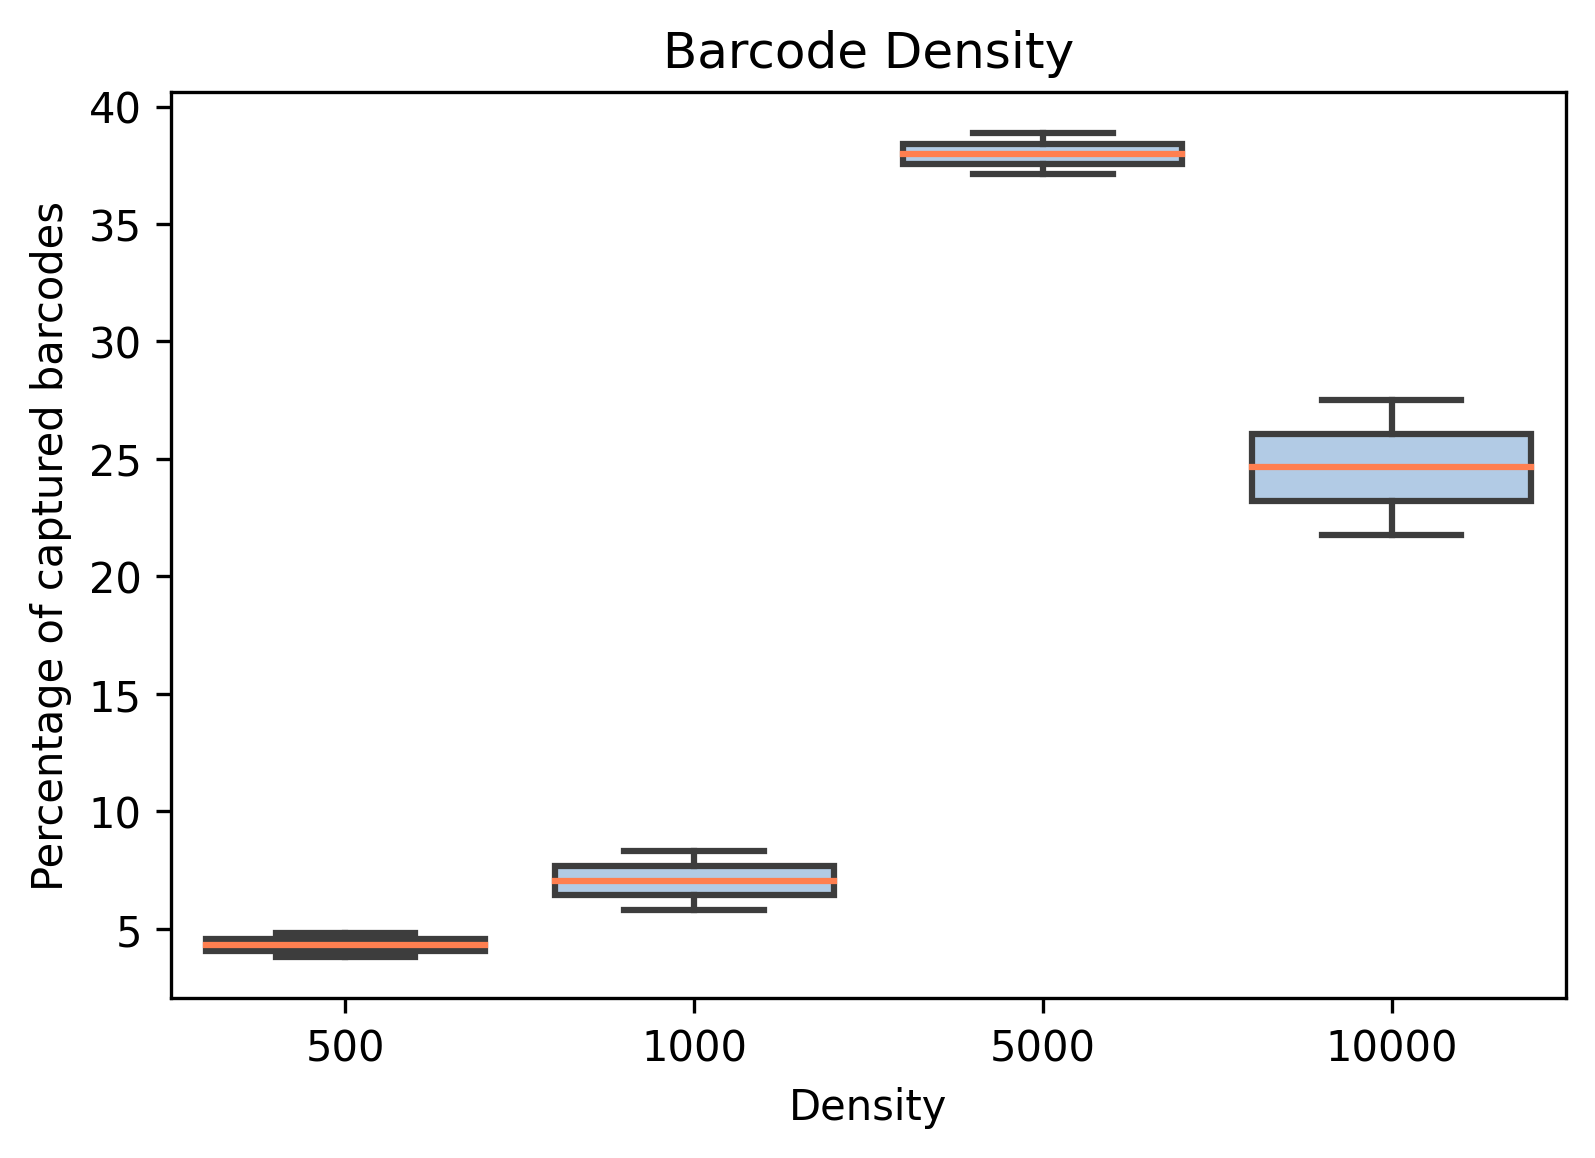

In [11]:
sns.boxplot(data=df_captured, x="ID", y="captured",
           notch=False, showcaps=True,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

plt.xlabel("Density")
plt.ylabel("Percentage of captured barcodes")
plt.title("Barcode Density")


plt.savefig(output_path+"/Percentage_of_captured_barcodes.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Barcode Density')

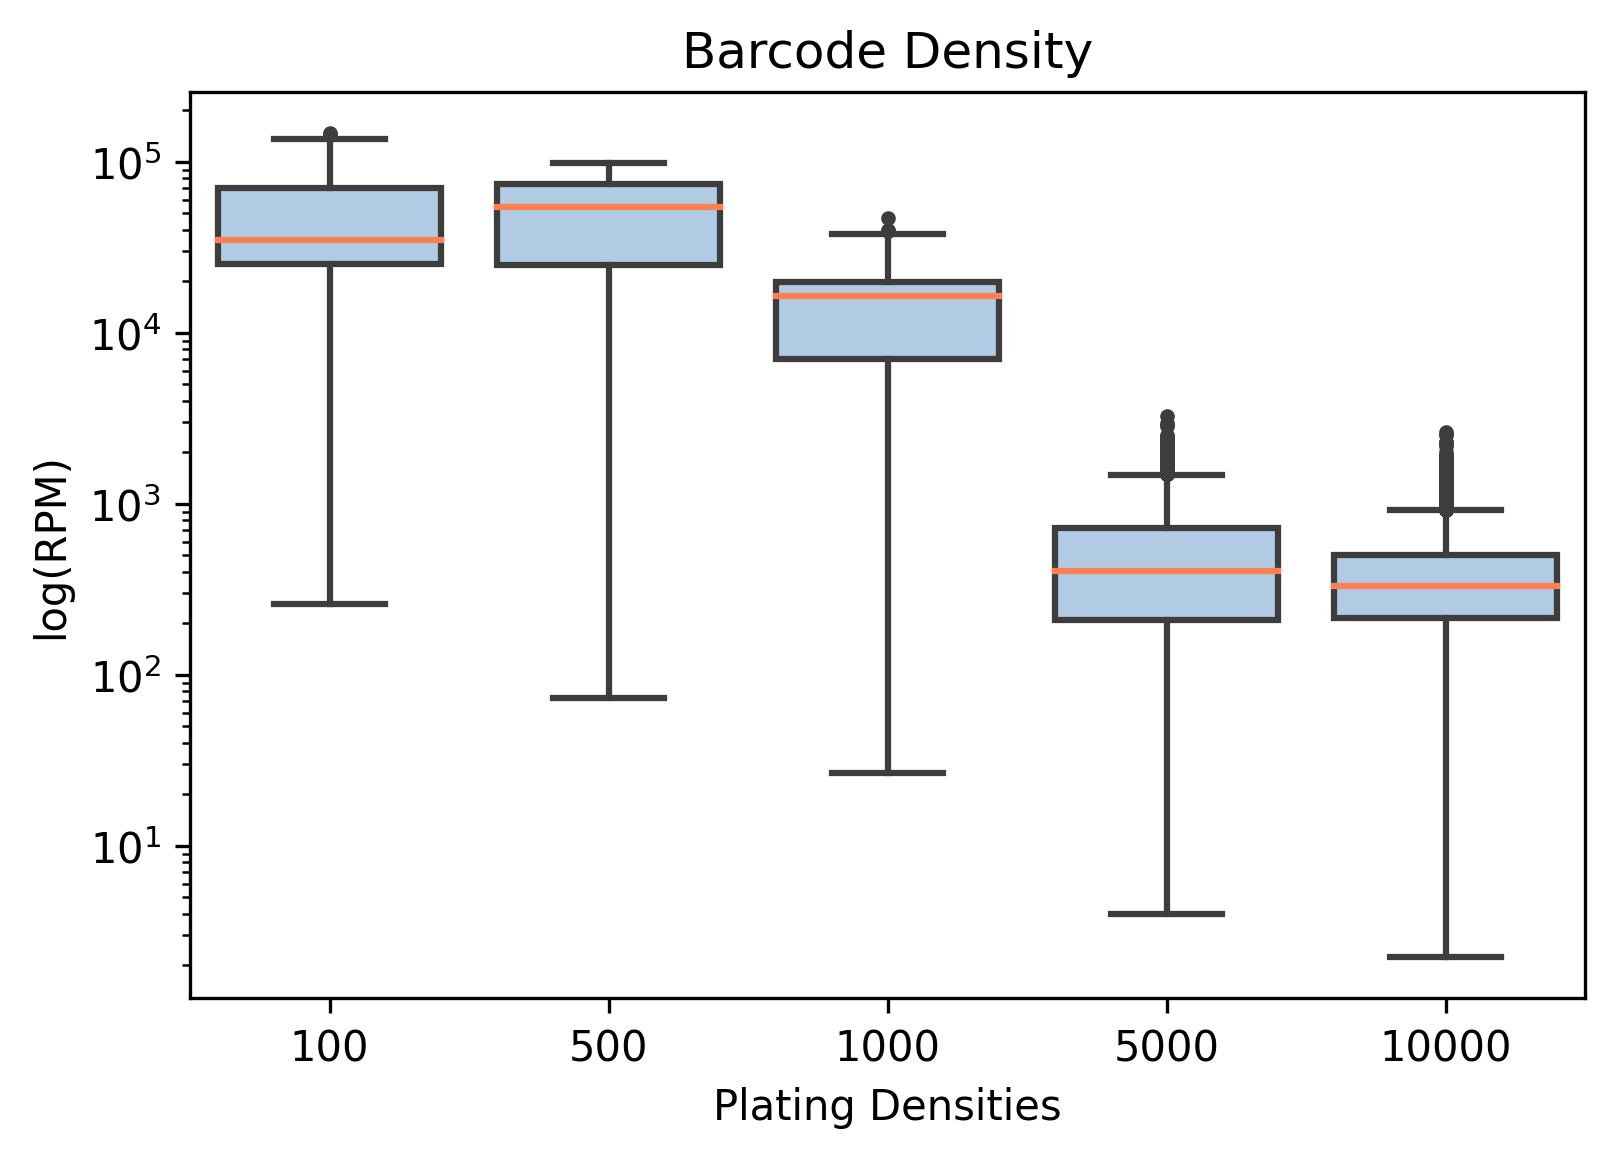

In [12]:

sns.boxplot(data = df_plot, x="ID", y="RPM",
           notch=False, showcaps=True,
    flierprops={"marker": "."},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

plt.yscale('log')

plt.xlabel("Plating Densities")
plt.ylabel("log(RPM)")
plt.title("Barcode Density")

#plt.savefig(output_path+"/log_RPM_box.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Barcode Density')

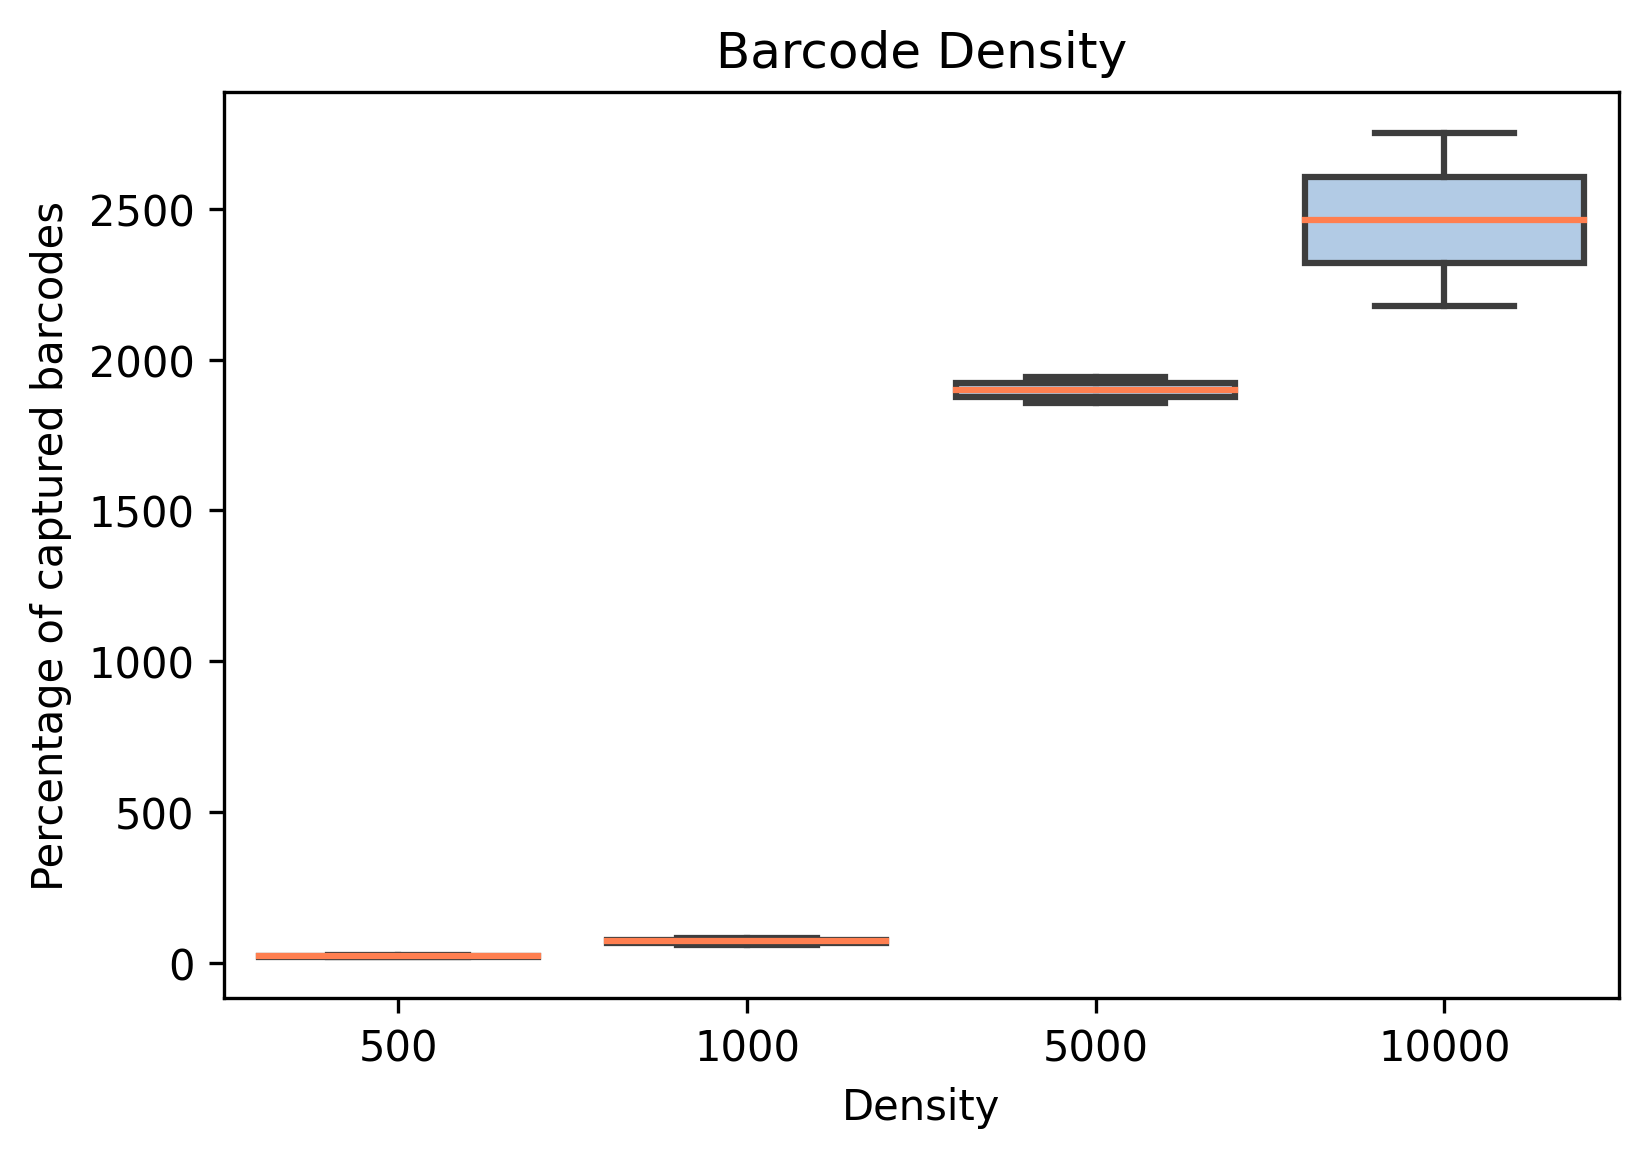

In [20]:
sns.boxplot(data=df_captured, x="ID", y="total_captured",
           notch=False, showcaps=True,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

plt.xlabel("Density")
plt.ylabel("Percentage of captured barcodes")
plt.title("Barcode Density")


#plt.savefig(output_path+"/Percentage_of_captured_barcodes.pdf", bbox_inches='tight')

In [16]:
df_plot

,seq,reads,RPM,RPM_log,file_d,barcode,ID,ID_num
0,TACACCAGCTCCTCCACCTACAGGTCCTTGAAGTCGAGGAAGACCA...,560,146712.077548,5.166466,RAR_100_Rep1,0,100,100
19,TGGATCATCTCCAAGTGCTAGTTCTGCTACTACTTCACCTTGTCCT...,2,260.010400,2.414991,RAR_100_Rep2,19,100,100
1,ACGTCCTGCTCCAGGTAGACCTTGATCTCGTCCTACTACTCGTGCA...,553,144878.176578,5.161003,RAR_100_Rep1,1,100,100
2,AGTCGTTCTGCTACATCACGACCAACACGTACTGGTAGACGTACAC...,549,143830.233167,5.157850,RAR_100_Rep1,2,100,100
3,ACCACCAGCTGGACGACCATGACCAACAACACGATCATGAGCTGGT...,481,126015.195179,5.100423,RAR_100_Rep1,3,100,100
...,...,...,...,...,...,...,...,...
2559,TCCTGCAGCACCACCAACTCGAGGTCCACGTTGTCCAGGTTCTTGA...,91,101.671547,2.007199,RAR_10K_Rep1,2559,10000,10000
2560,TGCAAGAAGTTCTCGAACTCGTTGAACTAGACCTGCATGATCTCCA...,91,101.671547,2.007199,RAR_10K_Rep1,2560,10000,10000
2561,TGGTTGAGGACCAGGAGGTCGACCATGATGTCGTTCAACACCTACA...,91,101.671547,2.007199,RAR_10K_Rep1,2561,10000,10000
2579,TGCATGTGCATGTCCTGCTACAACTAGTAGAGGTCGTCCATCTCGT...,89,99.437008,1.997548,RAR_10K_Rep1,2579,10000,10000


In [412]:
df_hist= df_plot.loc[df_plot['ID'] == '10000' ]

In [424]:
%matplotlib inline  

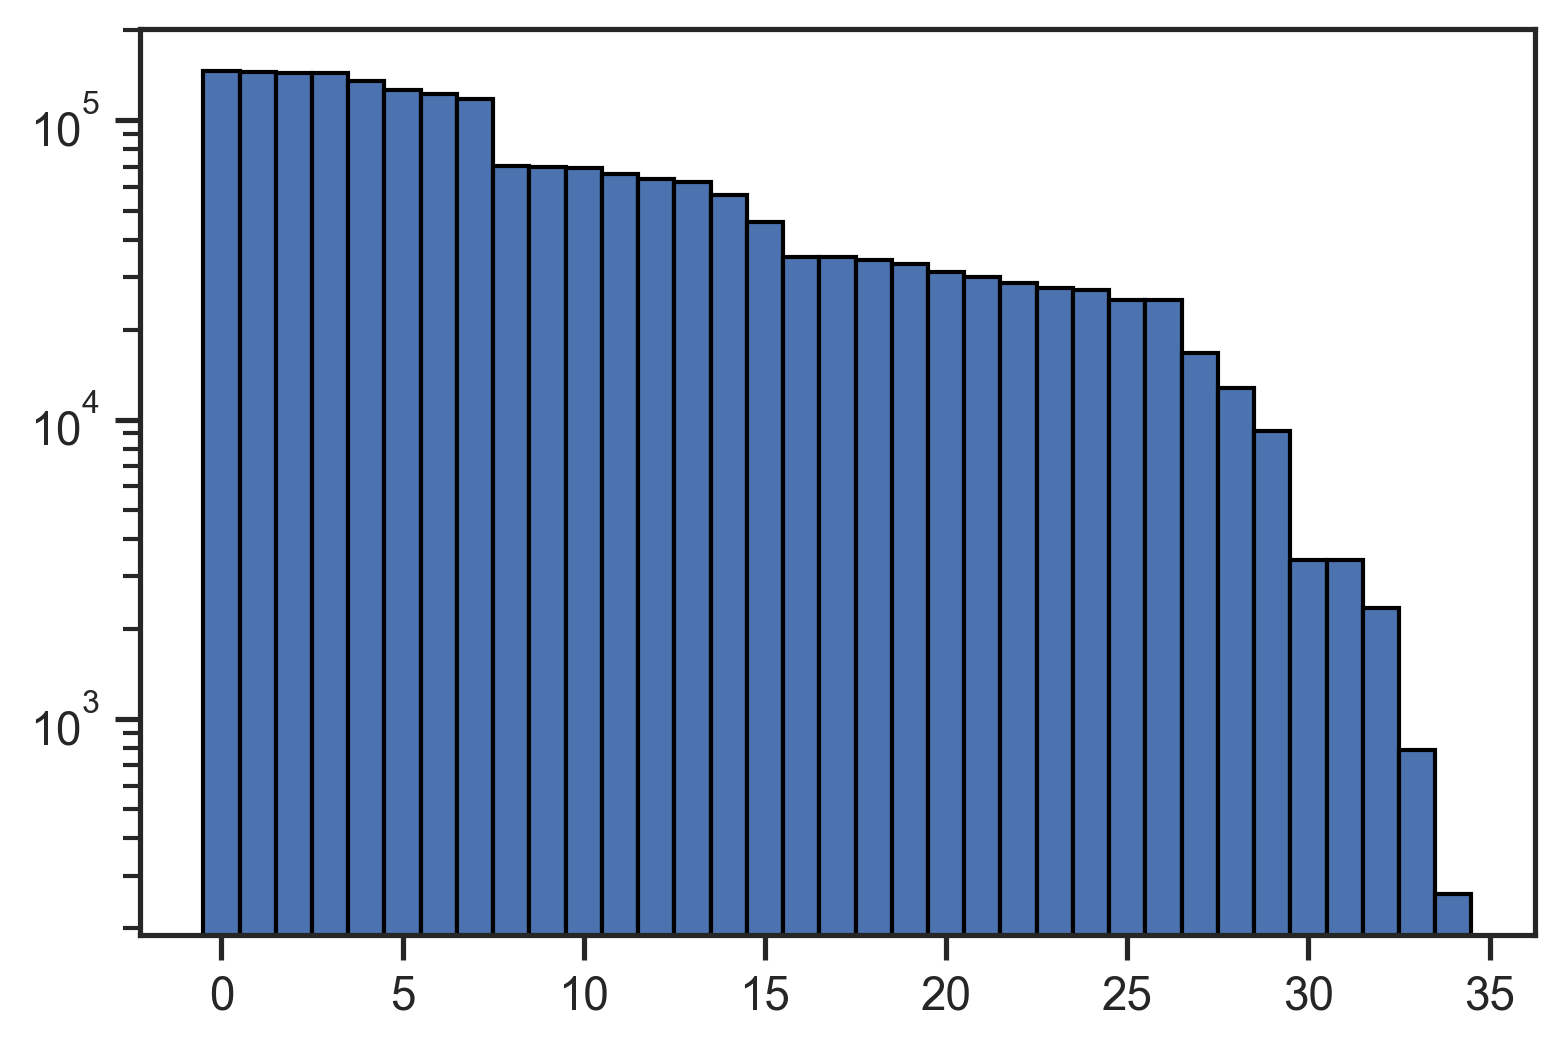

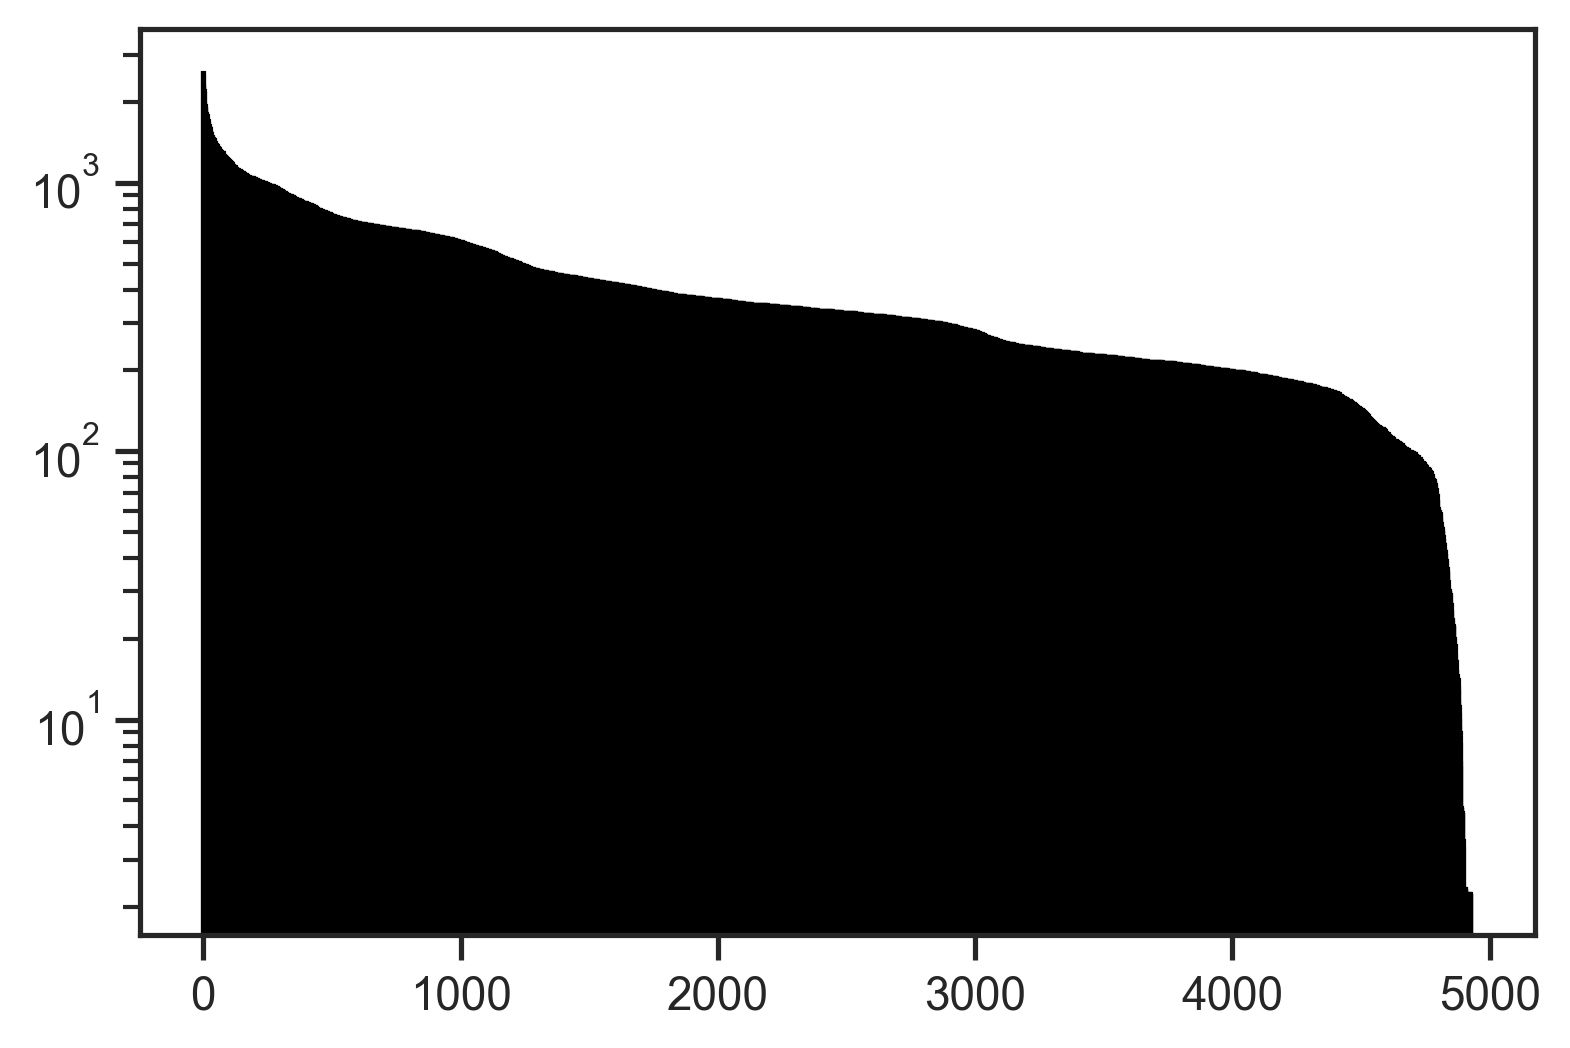

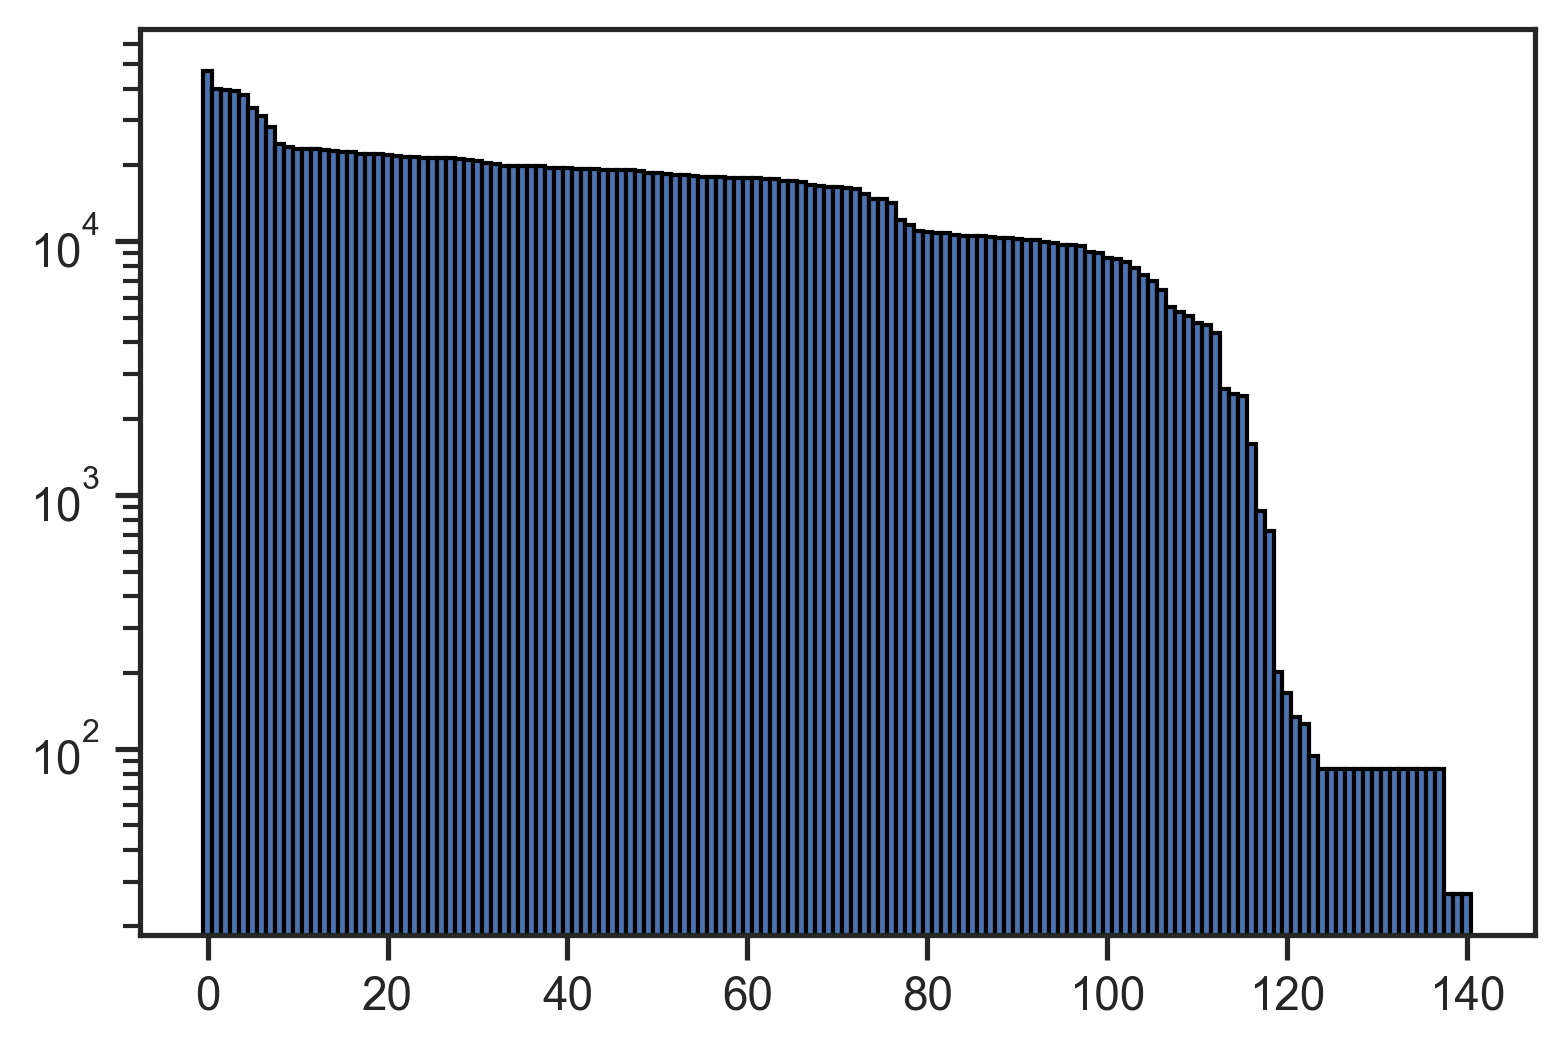

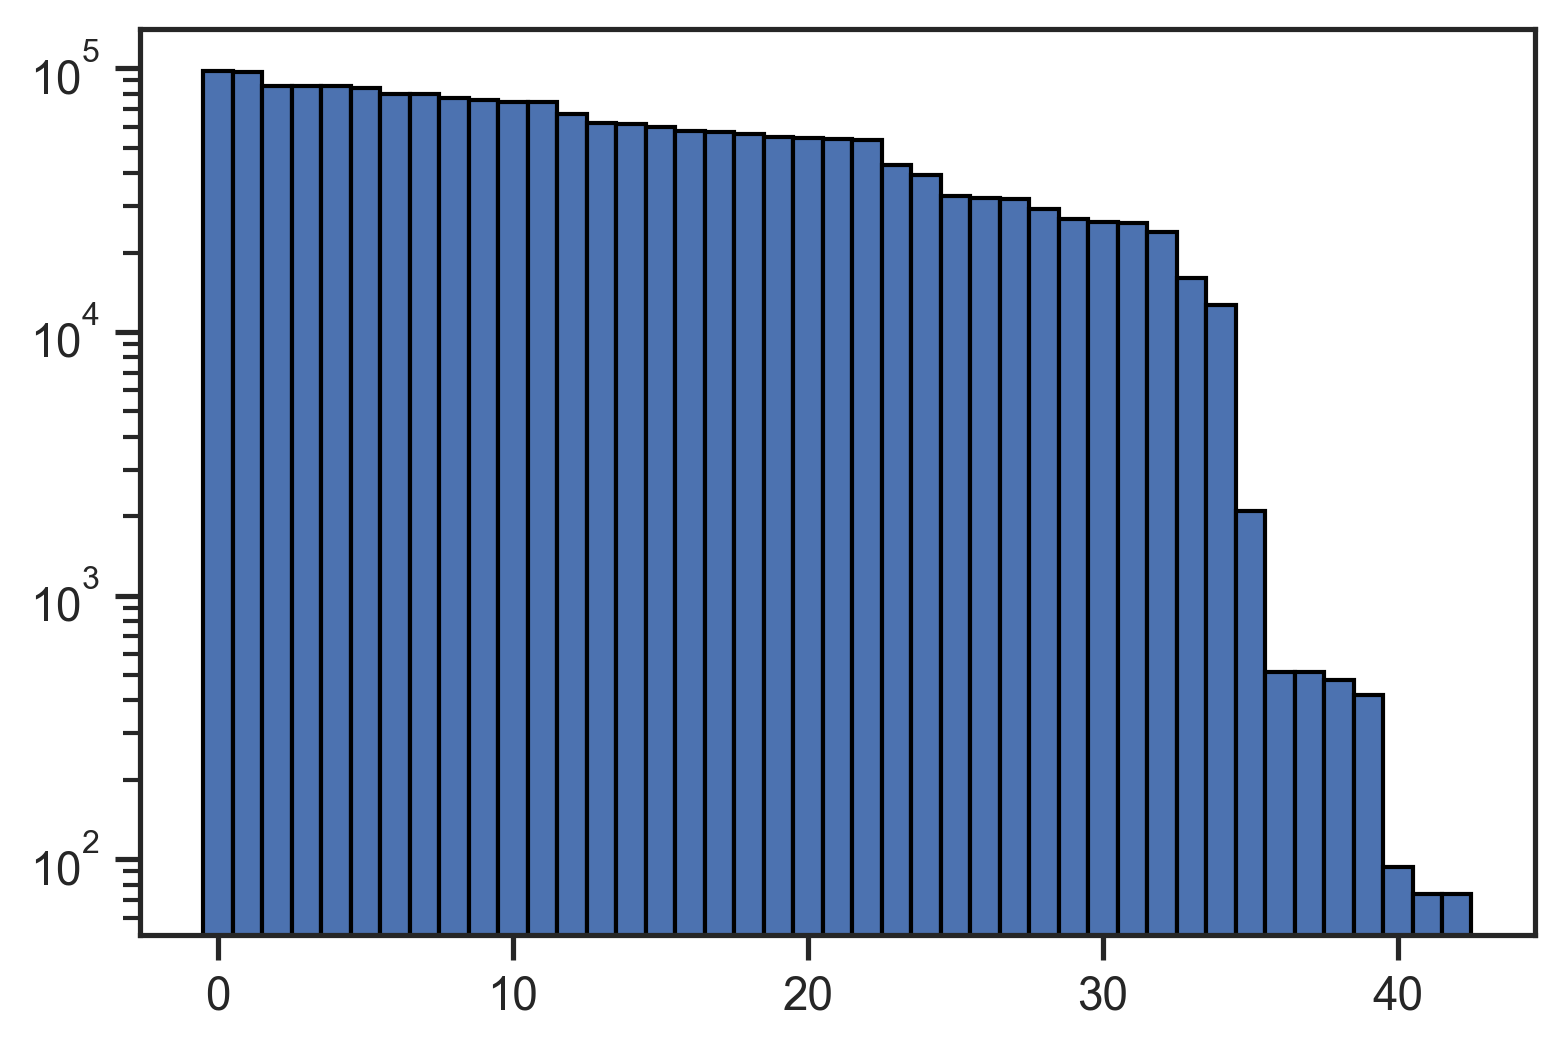

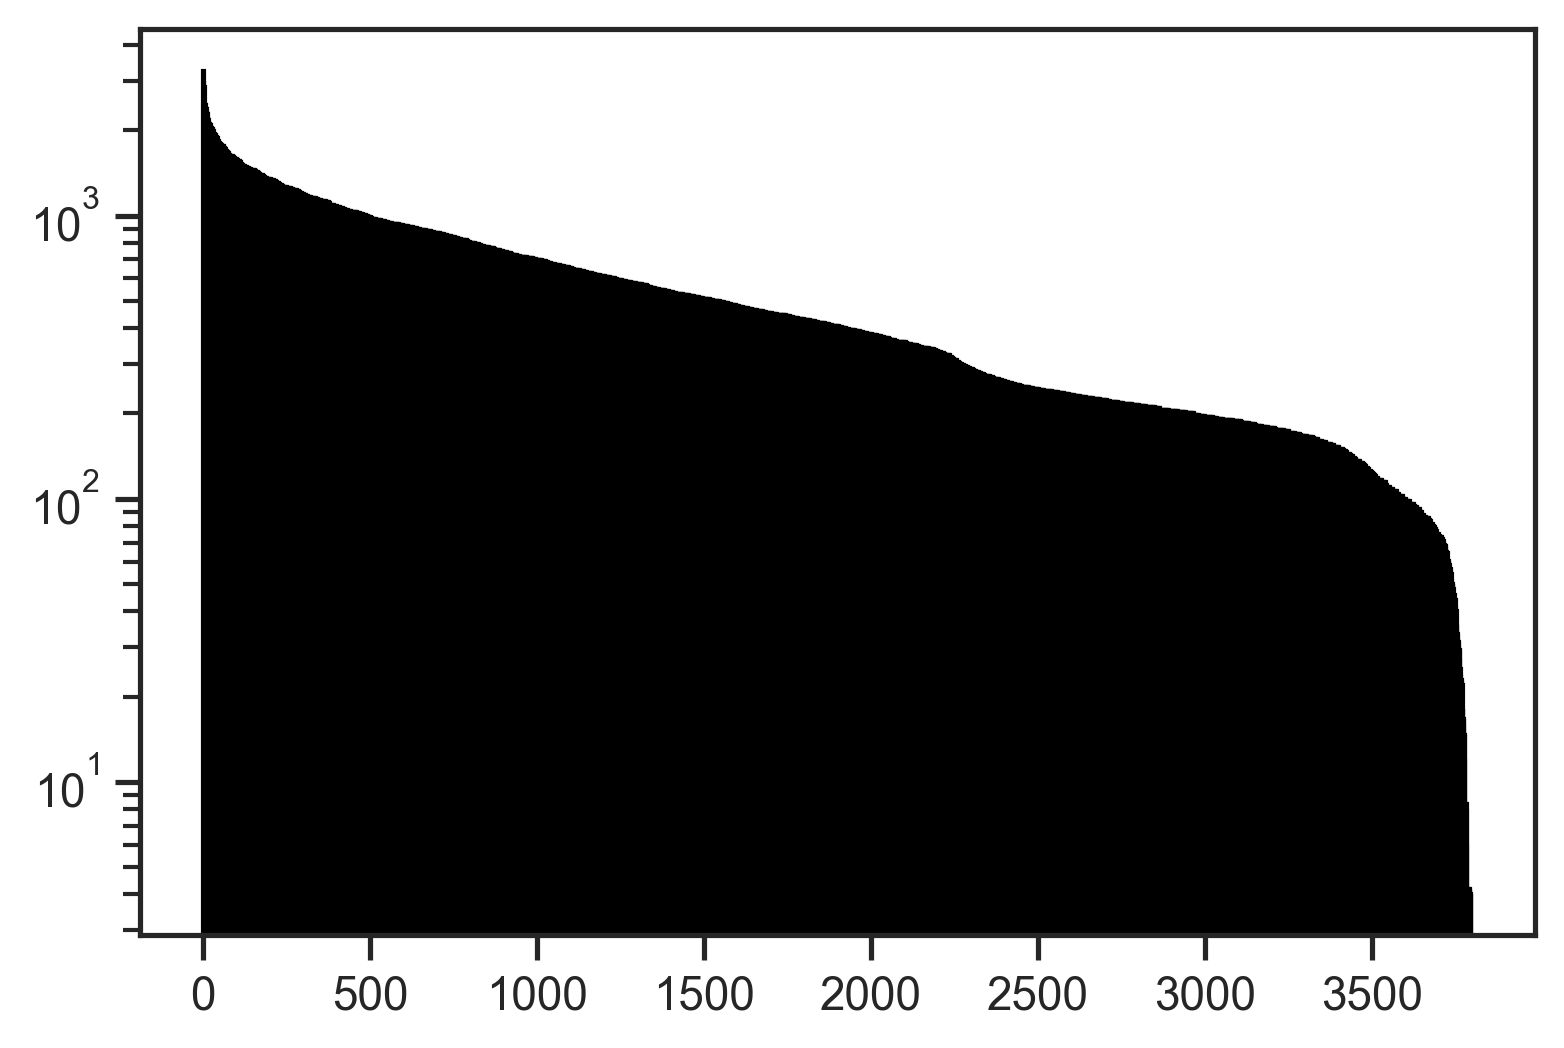

<Figure size 1800x1200 with 0 Axes>

In [468]:

ID = ['100','10000','1000','500','5000']
for id_ in ID:
    df_hist= df_plot.loc[df_plot['ID'] == id_ ]
    y = df_hist['RPM']
    col_y = range(len(df_hist['reads']))

    new_y =[]
    new_col_y =[]
    for x,m in enumerate(y):
        if np.isnan(m) == False:
            new_y.append(m)
            new_col_y.append(col_y[x])

    #Order
    index_y = sorted(range(len(new_y)), reverse=True,key=new_y.__getitem__)
    new_col_y = [new_col_y[k] for k in index_y]
    new_y = sorted(new_y, reverse=True)

    # #Plot
    plt.bar(range(len(new_y)),new_y, width = 1.0, edgecolor='black')
    plt.yscale('log')
    plt.show()
plt.savefig(output_path+"/barplot.pdf", bbox_inches='tight')

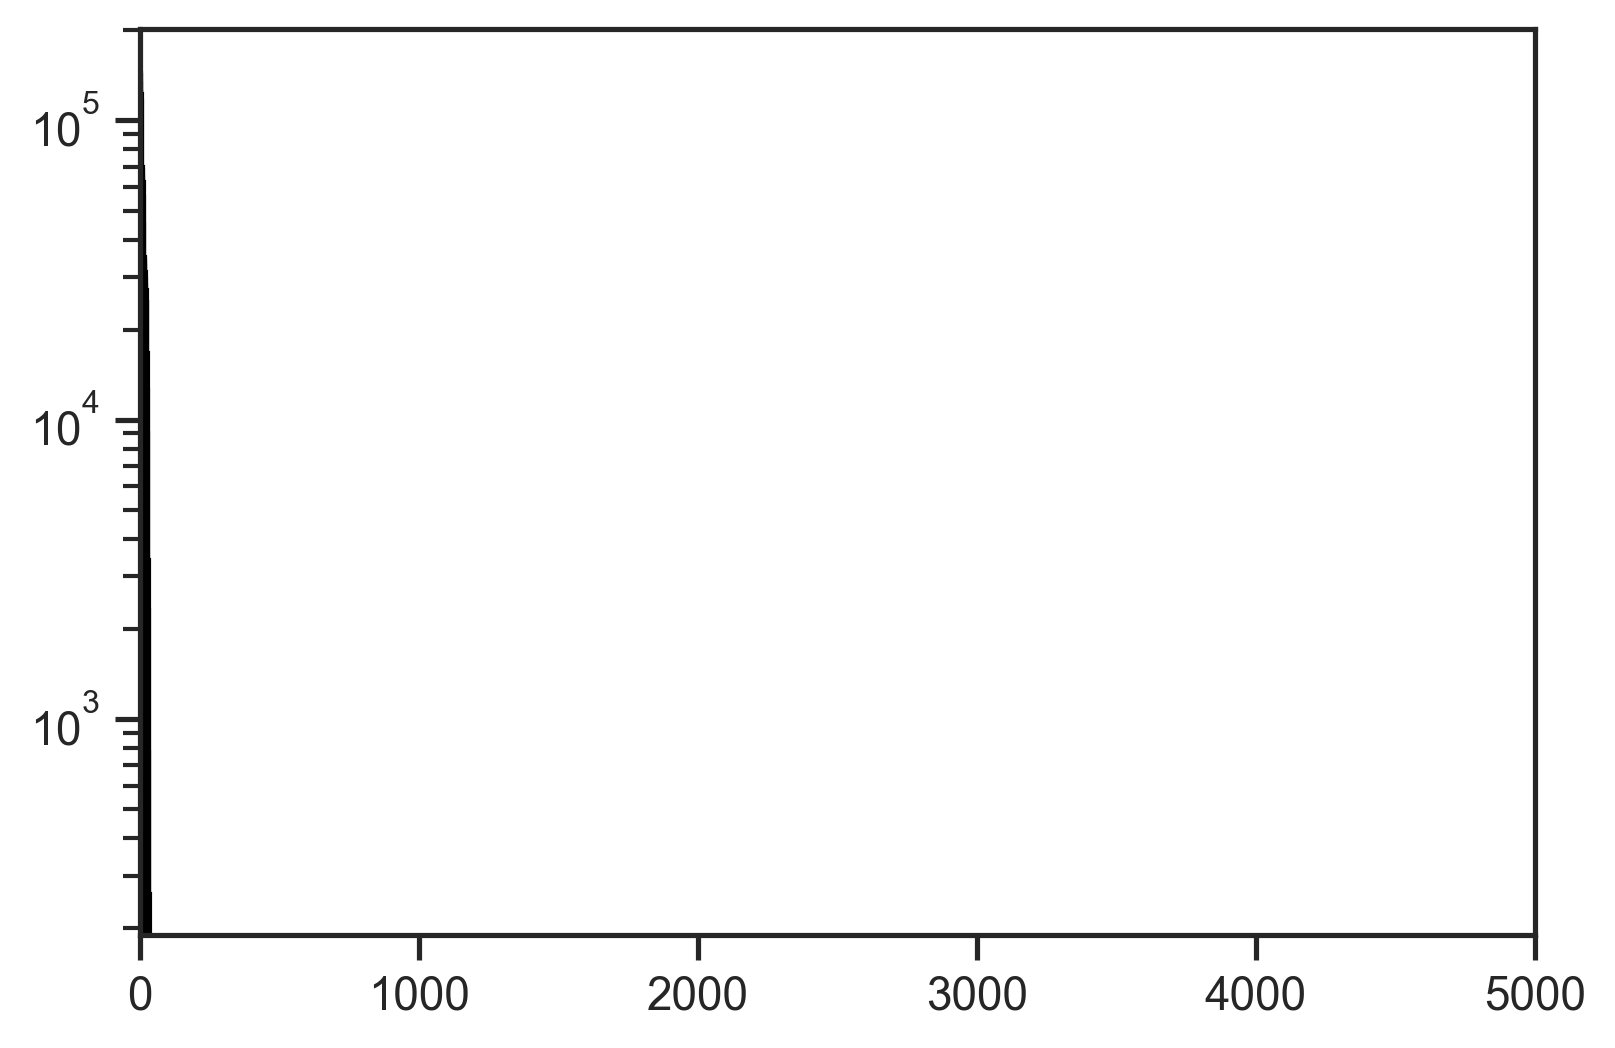

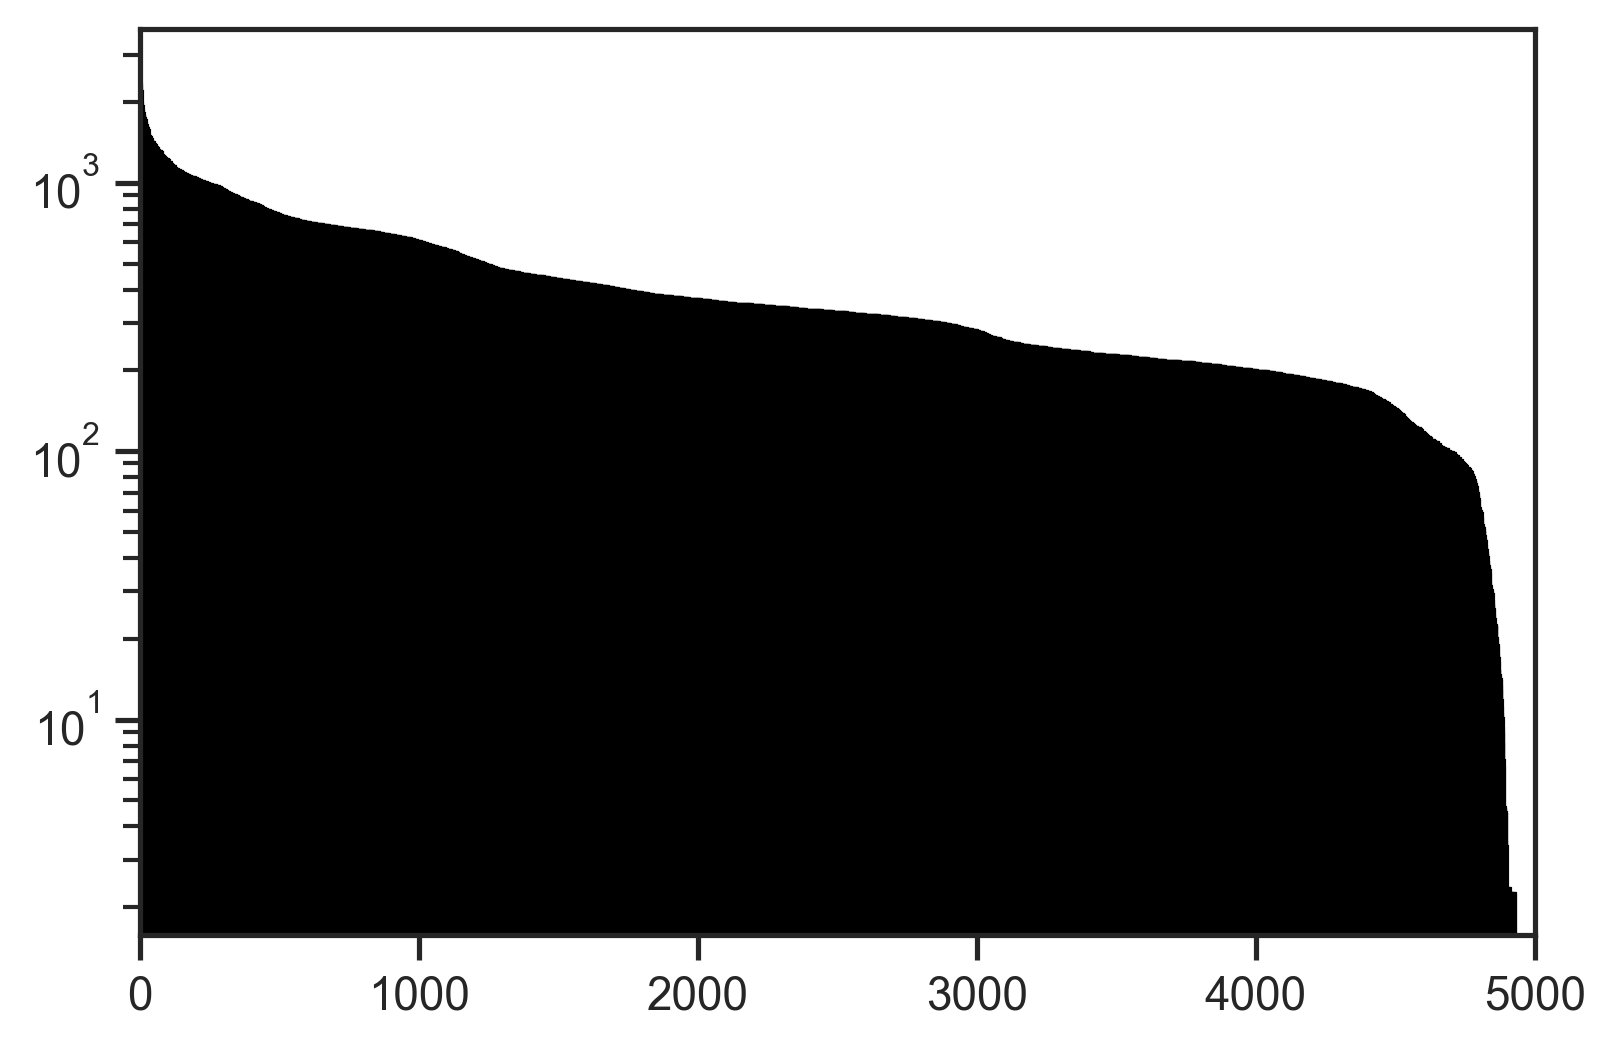

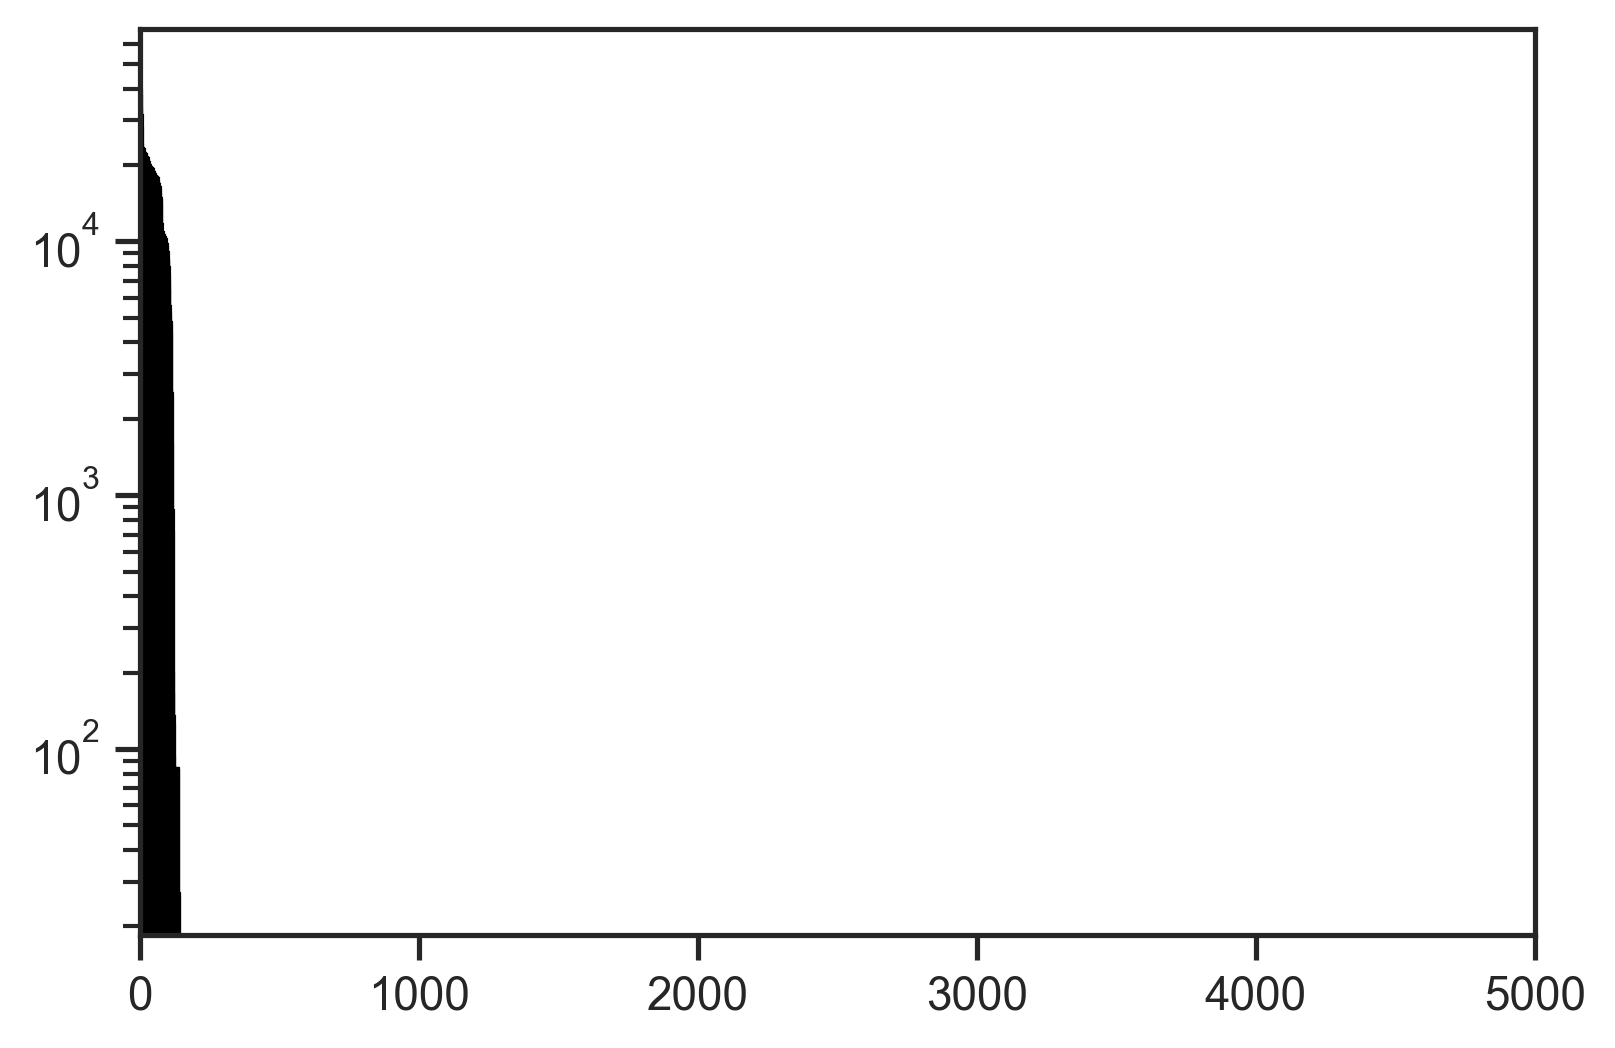

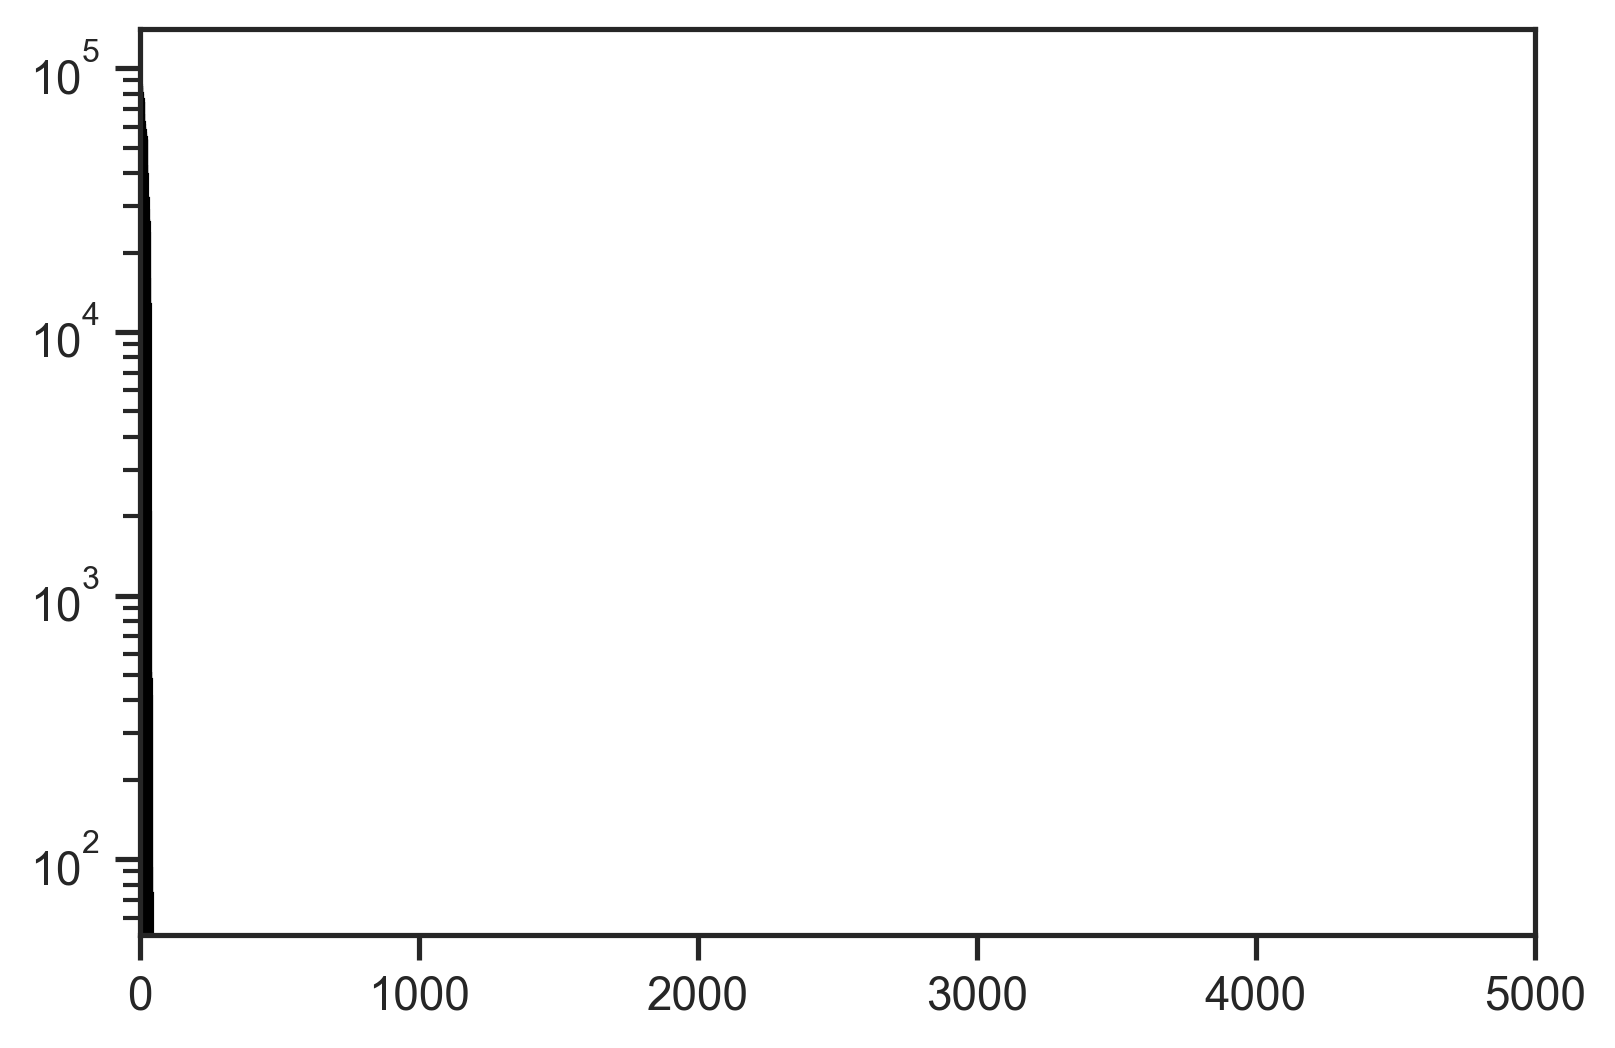

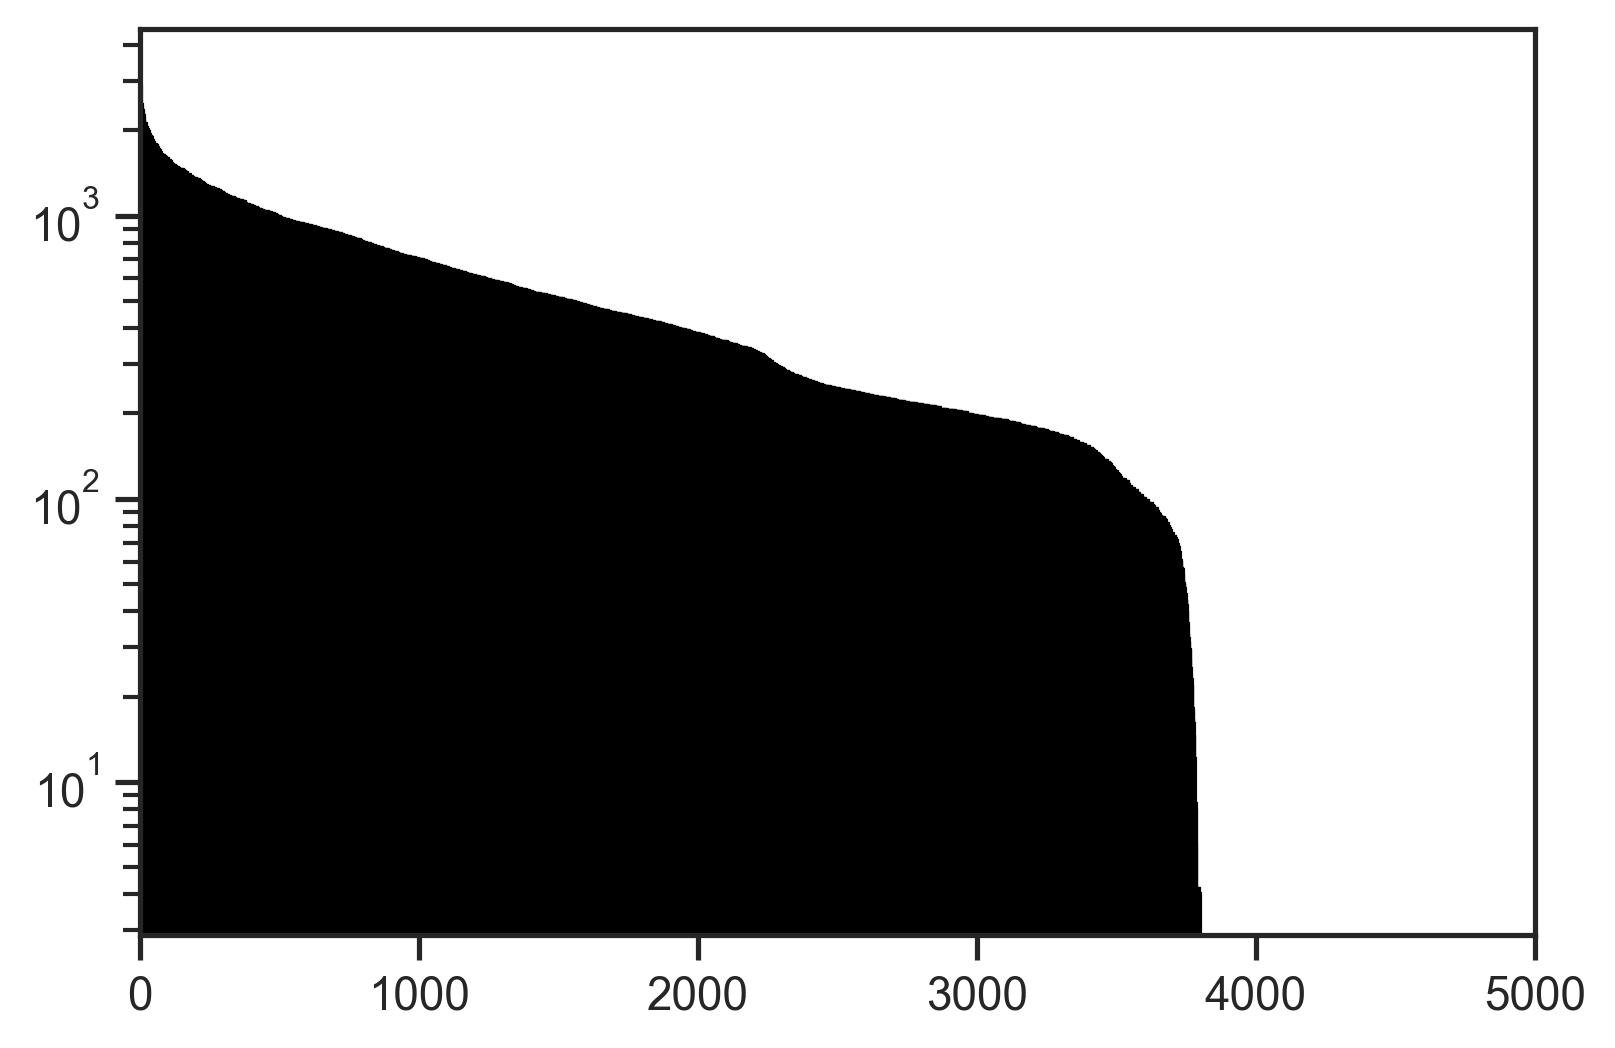

<Figure size 1800x1200 with 0 Axes>

In [469]:
with PdfPages(path_to_group_folder + 'barplot_group'+ str(counter)+'.pdf') as pdf:

    ID = ['100','10000','1000','500','5000']
    for id_ in ID:
        print("         " + id_)
        plot_f = plt.figure()
        df_hist= df_plot.loc[df_plot['ID'] == id_ ]
        y = df_hist['RPM']
        col_y = range(len(df_hist['reads']))

        new_y =[]
        new_col_y =[]
        for x,m in enumerate(y):
            if np.isnan(m) == False:
                new_y.append(m)
                new_col_y.append(col_y[x])

        #Order
        index_y = sorted(range(len(new_y)), reverse=True,key=new_y.__getitem__)
        new_col_y = [new_col_y[k] for k in index_y]
        new_y = sorted(new_y, reverse=True)

        # #Plot
        plt.bar(range(len(new_y)),new_y, width = 1.0, edgecolor='black')
        plt.xlim(0,5000)
        plt.yscale('log')
        plt.show()
        pdf.savefig(plot_f);
    plt.savefig(output_path+"/barplot_samex.pdf", bbox_inches='tight')

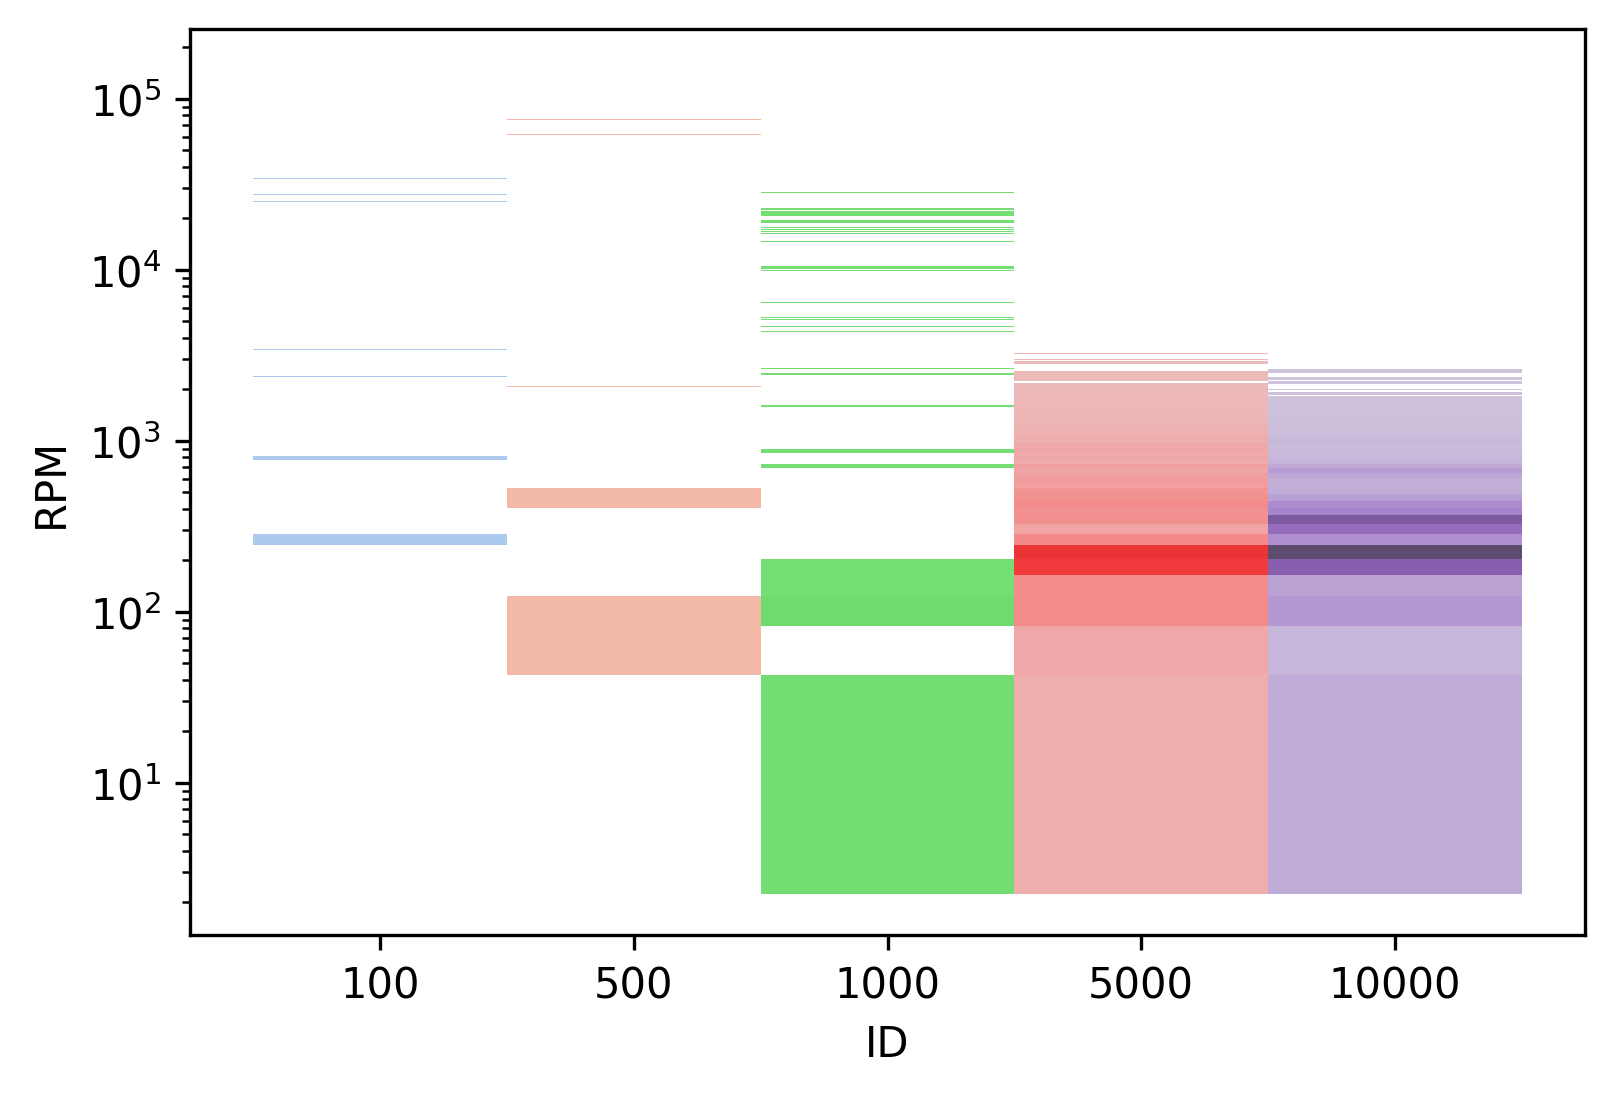

In [13]:
sns.histplot(
    df_plot, x="ID", y="RPM",
    hue="ID", legend=False)
plt.yscale('log')
#plt.xticks(rotation = 'vertical')

In [665]:
def heatmap(data, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs, aspect="auto", interpolation='none')

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    #ax.set_xticks(np.arange(data.shape[1]))
    #ax.set_yticks(np.arange(data.shape[0]))
    

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
    #               labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #         rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=0)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    
    ax.set(xticklabels=[])  
    ax.set(xlabel=None)
    ax.tick_params(bottom=False)  # remove the ticks
    
    ax.set(yticklabels=[])  
    ax.set(ylabel=None)
    ax.tick_params(left=False)  # remove the ticks
    
    ax.tick_params(labelsize=20)


    return im, cbar

In [680]:
df_plot.groupby('ID_num').size()

ID_num
100        35
500        43
1000      141
5000     3799
10000    4929
dtype: int64

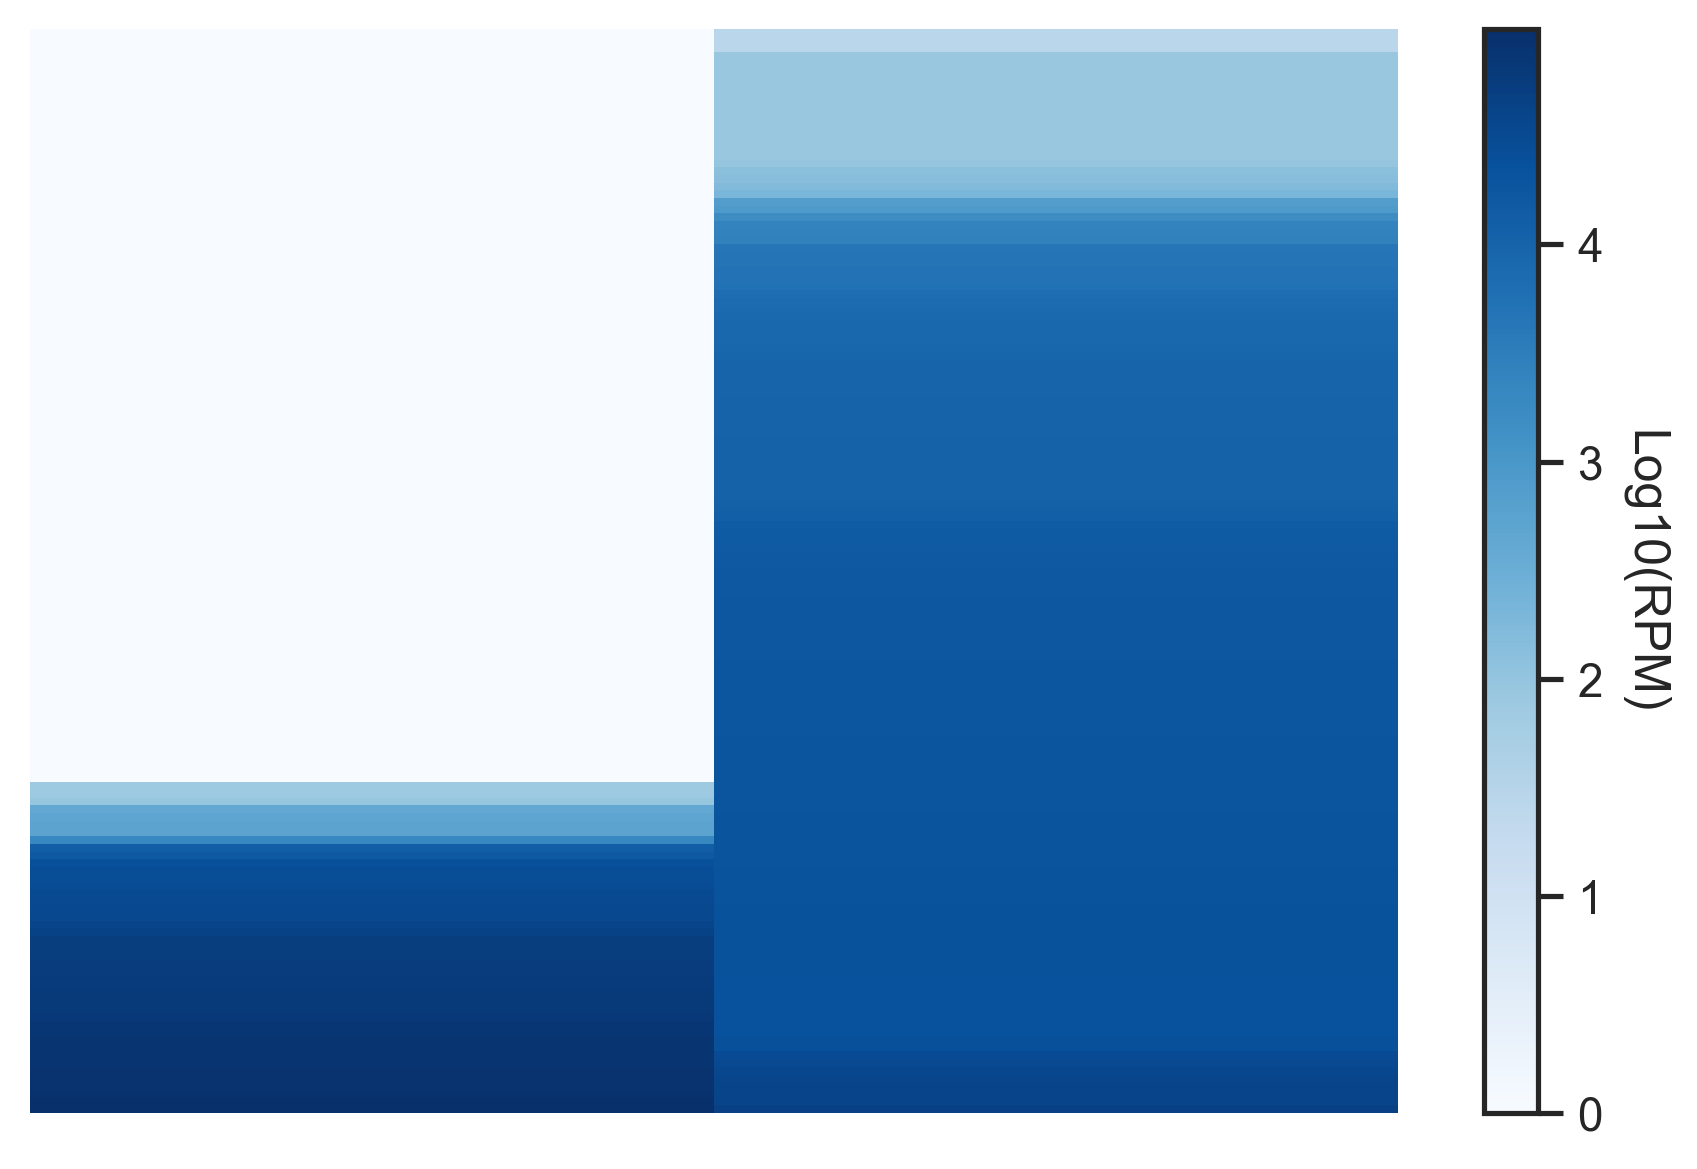

In [683]:
ID = ['500','1000']#,'5000','10000']

max_barcode = range(0,141)

hold = [0]*len(max_barcode)

for id_ in ID:
    
    df_i= df_plot.loc[df_plot['ID'] == id_ ]
    df_i = df_i.sort_values(by = ['RPM_log'], ascending=False)
    rpm_i = [0]*len(max_barcode)
    rpm_i[0:len(df_i["ID"])] = df_i["RPM_log"]
    rpm_i = np.sort(rpm_i)
    hold  = np.column_stack((hold, rpm_i))
    
hold = hold[:,1:len(hold)]

fig, ax = plt.subplots()


vegetables = max_barcode
farmers = ID 

harvest = np.array(hold)

im, cbar = heatmap(harvest, ax=ax,
                   cmap='Blues', cbarlabel="Log10(RPM)")

fig.tight_layout()
plt.savefig(output_path+"/small_hist.pdf", bbox_inches='tight')
plt.show()



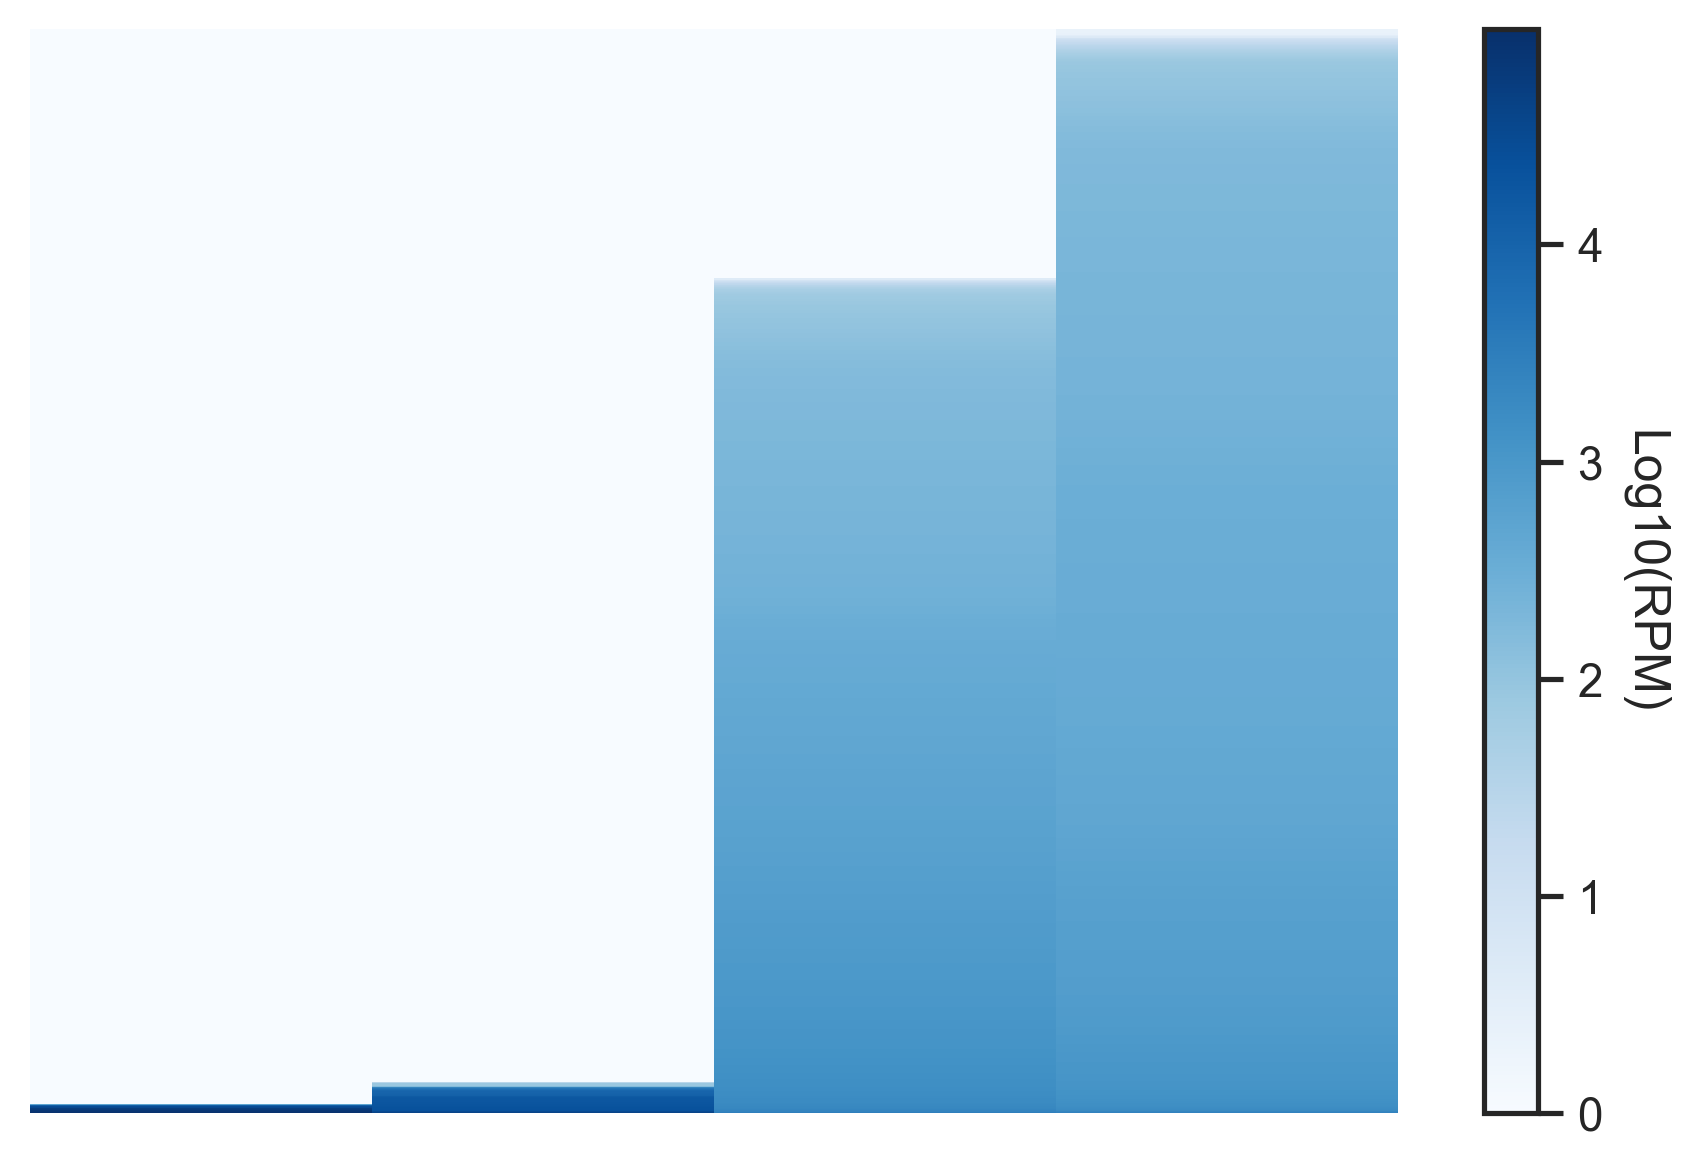

In [684]:
ID = ['500','1000','5000','10000']

max_barcode = range(0,4929)

hold = [0]*len(max_barcode)

for id_ in ID:
    
    df_i= df_plot.loc[df_plot['ID'] == id_ ]
    df_i = df_i.sort_values(by = ['RPM_log'], ascending=False)
    rpm_i = [0]*len(max_barcode)
    rpm_i[0:len(df_i["ID"])] = df_i["RPM_log"]
    rpm_i = np.sort(rpm_i)
    hold  = np.column_stack((hold, rpm_i))
    
hold = hold[:,1:len(hold)]

fig, ax = plt.subplots()


vegetables = max_barcode
farmers = ID 

harvest = np.array(hold)

im, cbar = heatmap(harvest, ax=ax,
                   cmap='Blues', cbarlabel="Log10(RPM)")

fig.tight_layout()
plt.savefig(output_path+"/full_hist.pdf", bbox_inches='tight')
plt.show()